# Lab Assignment 2 - AIDI 2004
Rahul Esiripally 100892591

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

def gini(df, target, column, threshold) :
    n0 = df[df[column]<=threshold].shape[0]
    p0 = df[(df[target]==0) & (df[column]<=threshold)].shape[0]/n0
    gini_left = 1 - p0*p0 -(1-p0)*(1-p0)
    n1 = df[df[column]>threshold].shape[0]
    p1 = df[(df[target]==0) & (df[column]>threshold)].shape[0]/n1
    gini_right= 1 - p1*p1 -(1-p1)*(1-p1)
    return gini_left*n0/(n0+n1) + gini_right*n1/(n0+n1)

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.drop(["id","Unnamed: 32"], axis = 1)

<AxesSubplot:>

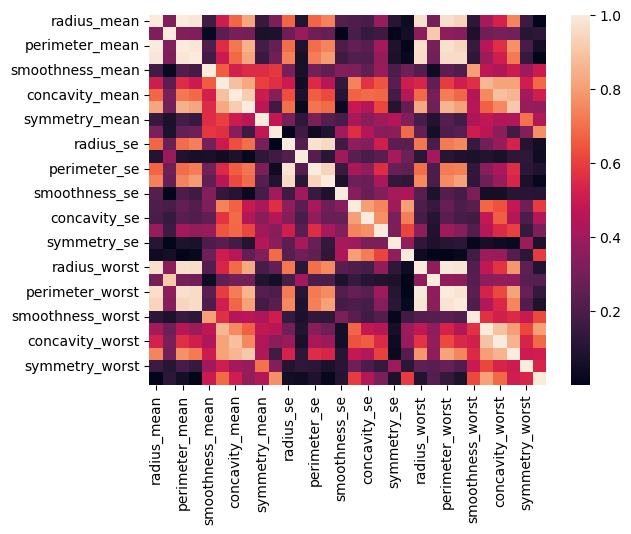

In [5]:
sns.heatmap(abs(df[df.columns].corr()))

# Decission Tree Classifier

<Figure size 1100x1100 with 0 Axes>

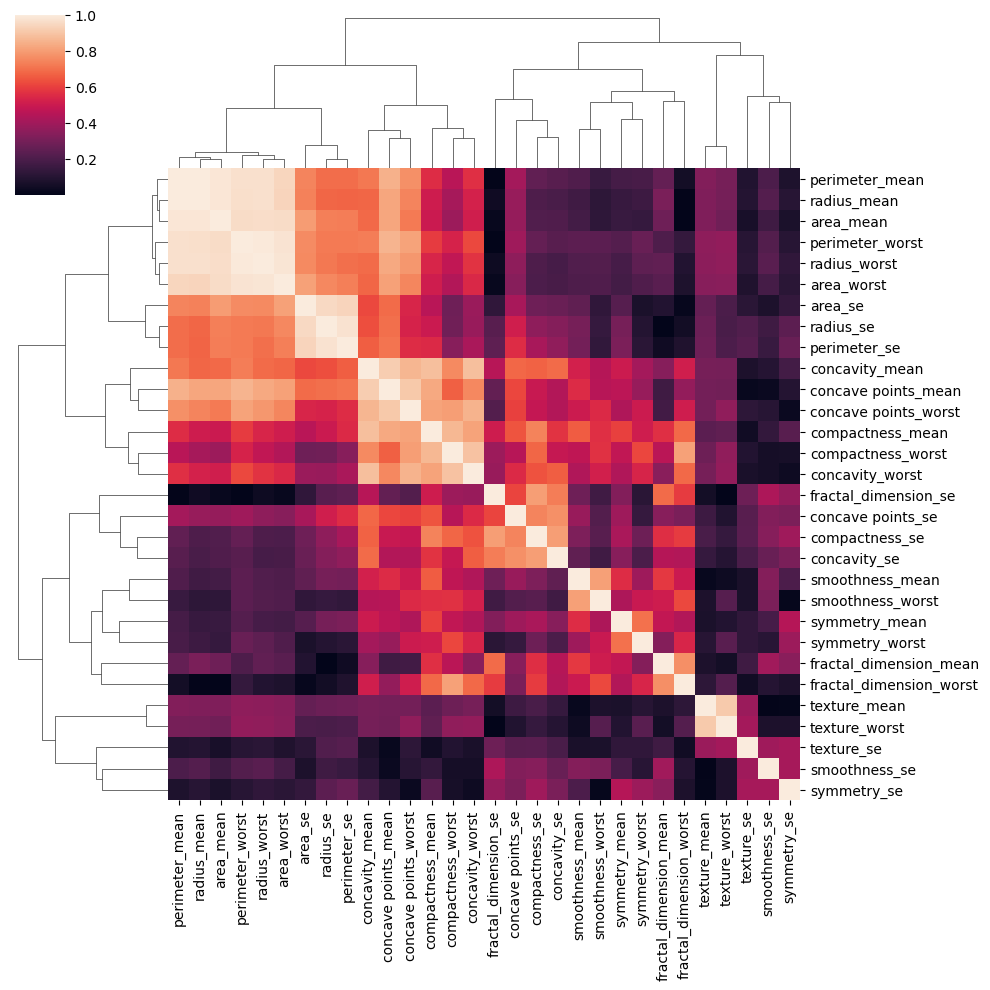

In [6]:
plt.figure(figsize=(11,11))
sns.clustermap(abs(df.corr()))

In [7]:
y= df["diagnosis"]
X = df.drop(["diagnosis"],axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

0.9473684210526315

In [10]:
pd.crosstab(y_test,prediction, rownames = ["Reel"], colnames=["Predisction"])

Predisction,B,M
Reel,,
B,71,1
M,5,37


In [11]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           B       0.93      0.99      0.96        72
           M       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, scoring="accuracy", cv = 10)
scores.mean()

0.9210213032581454